# Genetiske algoritmer

Denne notatboken er en del av [AI for Beginners Curriculum](http://github.com/microsoft/ai-for-beginners).


In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math
import time

## Litt teori

**Genetiske algoritmer** (GA) er basert på en **evolusjonær tilnærming** til AI, der metoder for evolusjon av en populasjon brukes for å finne en optimal løsning for et gitt problem. De ble foreslått i 1975 av [John Henry Holland](https://en.wikipedia.org/wiki/John_Henry_Holland).

Genetiske algoritmer bygger på følgende ideer:
* Gyldige løsninger på problemet kan representeres som **gener**
* **Kryssing** lar oss kombinere to løsninger for å få en ny gyldig løsning
* **Seleksjon** brukes til å velge mer optimale løsninger ved hjelp av en **fitness-funksjon**
* **Mutasjoner** introduseres for å destabilisere optimaliseringen og få oss ut av lokale minima

Hvis du vil implementere en genetisk algoritme, trenger du følgende:

 * Å finne en metode for å kode problemets løsninger ved hjelp av **gener** $g\in\Gamma$
 * På settet av gener $\Gamma$ må vi definere en **fitness-funksjon** $\mathrm{fit}: \Gamma\to\mathbb{R}$. Mindre funksjonsverdier tilsvarer bedre løsninger.
 * Å definere en **kryssingsmekanisme** for å kombinere to gener og få en ny gyldig løsning $\mathrm{crossover}: \Gamma^2\to\Gamma$.
 * Å definere en **mutasjonsmekanisme** $\mathrm{mutate}: \Gamma\to\Gamma$.
I mange tilfeller er kryssing og mutasjon ganske enkle algoritmer for å manipulere gener som numeriske sekvenser eller bitvektorer.

Den spesifikke implementeringen av en genetisk algoritme kan variere fra tilfelle til tilfelle, men den generelle strukturen er som følger:

1. Velg en startpopulasjon $G\subset\Gamma$
2. Velg tilfeldig en av operasjonene som skal utføres i dette steget: kryssing eller mutasjon 
3. **Kryssing**:
  * Velg tilfeldig to gener $g_1, g_2 \in G$
  * Beregn kryssing $g=\mathrm{crossover}(g_1,g_2)$
  * Hvis $\mathrm{fit}(g)<\mathrm{fit}(g_1)$ eller $\mathrm{fit}(g)<\mathrm{fit}(g_2)$ - erstatt det tilsvarende genet i populasjonen med $g$.
4. **Mutasjon** - velg et tilfeldig gen $g\in G$ og erstatt det med $\mathrm{mutate}(g)$
5. Gjenta fra steg 2, til vi får en tilstrekkelig lav verdi av $\mathrm{fit}$, eller til grensen for antall steg er nådd.

Oppgaver som ofte løses med GA:
1. Optimalisering av tidsplaner
1. Optimal pakking
1. Optimal skjæring
1. Akselerering av uttømmende søk


## Problem 1: Rettferdig deling av skatt

**Oppgave**:  
To personer har funnet en skatt som inneholder diamanter i forskjellige størrelser (og tilsvarende forskjellige priser). De må dele skatten i to deler på en slik måte at prisforskjellen er 0 (eller minimal).

**Formell definisjon**:  
Vi har et sett med tall $S$. Vi må dele det inn i to delmengder $S_1$ og $S_2$, slik at $$\left|\sum_{i\in S_1}i - \sum_{j\in S_2}j\right|\to\min$$ og $S_1\cup S_2=S$, $S_1\cap S_2=\emptyset$.

Først og fremst, la oss definere settet $S$:


In [3]:
N = 200
S = np.array([random.randint(1,10000) for _ in range(N)])
print(S)

[8344 2197 9335 3131 5863 9429 3818 9791   15 5455 1396 9538 4872 6549
 8587 5986 6021 9764 8102 5083 5739 7684 8498 3007 6599  820 7490 2372
 9370 5235 3525 3154  859 1906 8159 3950 2173 2988 2050  349 8713 2284
 4177 6033 1651 9176 5049 8201  171 5081 1216 3756 4711 2757 7738 1272
 5650 6584 5395 9004 7797  969 8104 1283 1392 4001 5768  445  274  256
 8239 8015 4381 9021 1189 8879 1411 3539 6526 8011  136 7230 2332  451
 5702 2989 4320 2446 9578 8486 4027 2410 9588 8981 2177 1493 3232 9151
 4835 5594 6859 8394  369 3200  126 4259 2283 7755 2014 2458 8327 8082
 7413 7622 1206 5533 8751 3495 5868 8472 6850 3958 3149 4672 4810 6274
 4700 6134 4627 4616 6656 9949  884 2256 7419 1926 7973 5319 5967 9158
 3823 7697 9466 5675 5412 9784 5426 8209 3421 1136 6047 4429 8001 4417
 1381  722 7350 6018 6235 7860 5853 7660 5937 6242    1 9552 3971 8302
 2633 9227 7283  154 8599 4269 9392 8539 1630  368 2409 9351 3838 9814
 6186 5743 5083 1325 1610  779 3643 3262 5768 8725  961 4611 6310 4788
 1648 

La oss kode hver mulig løsning av problemet med en binær vektor $B\in\{0,1\}^N$, hvor tallet på $i$-te posisjon viser hvilken av settene ($S_1$ eller $S_2$) det $i$-te tallet i det opprinnelige settet $S$ tilhører. `generate`-funksjonen vil generere disse tilfeldige binære vektorene.


In [5]:
def generate(S):
    return np.array([random.randint(0,1) for _ in S])

b = generate(S)
print(b)

[1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1
 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0
 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1
 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1
 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0
 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0]


La oss nå definere `fit`-funksjonen som beregner "kostnaden" for løsningen. Det vil være forskjellen mellom summen av to sett, $S_1$ og $S_2$:


In [6]:
def fit(B,S=S):
    c1 = (B*S).sum()
    c2 = ((1-B)*S).sum()
    return abs(c1-c2)

fit(b)

133784

Nå må vi definere funksjoner for mutasjon og krysning:
* For mutasjon vil vi velge én tilfeldig bit og negere den (endre fra 0 til 1 og omvendt)
* For krysning vil vi ta noen biter fra én vektor og noen biter fra en annen. Vi vil bruke den samme `generate`-funksjonen til å tilfeldig velge hvilke biter som skal tas fra hvilken av de innkommende maskene.


In [7]:
def mutate(b):
    x = b.copy()
    i = random.randint(0,len(b)-1)
    x[i] = 1-x[i]
    return x

def xover(b1,b2):
    x = generate(b1)
    return b1*x+b2*(1-x)

In [8]:
pop_size = 30
P = [generate(S) for _ in range(pop_size)]

Nå, hovedfunksjonen for å utføre evolusjonen. `n` er antall evolusjonstrinn som skal gjennomføres. Ved hvert trinn:
* Med en sannsynlighet på 30 % utfører vi en mutasjon, og erstatter elementet med den dårligste `fit`-funksjonen med det muterte elementet
* Med en sannsynlighet på 70 % utfører vi en krysning

Funksjonen returnerer den beste løsningen (genet som tilsvarer den beste løsningen), og historikken over den minimale `fit`-funksjonen i populasjonen ved hver iterasjon.


In [9]:
def evolve(P,S=S,n=2000):
    res = []
    for _ in range(n):
        f = min([fit(b) for b in P])
        res.append(f)
        if f==0:
            break
        if random.randint(1,10)<3:
            i = random.randint(0,len(P)-1)
            b = mutate(P[i])
            i = np.argmax([fit(z) for z in P])
            P[i] = b
        else:
            i = random.randint(0,len(P)-1)
            j = random.randint(0,len(P)-1)
            b = xover(P[i],P[j])
            if fit(b)<fit(P[i]):
                P[i]=b
            elif fit(b)<fit(P[j]):
                P[j]=b
            else:
                pass
    i = np.argmin([fit(b) for b in P])
    return (P[i],res)

(s,hist) = evolve(P)
print(s,fit(s))

[0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0
 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0
 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1
 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0
 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1
 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1] 4


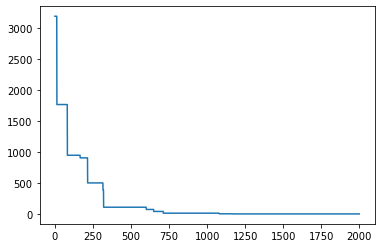

In [10]:
plt.plot(hist)
plt.show()

## Problem 2: N-dronningers problem

**Oppgave**:  
Du må plassere $N$ dronninger på et sjakkbrett av størrelse $N\times N$ på en slik måte at de ikke angriper hverandre.

Først og fremst, la oss løse problemet uten genetiske algoritmer, ved å bruke fullstendig søk. Vi kan representere tilstanden til brettet med listen $L$, der det $i$-te tallet i listen er den horisontale posisjonen til dronningen i den $i$-te raden. Det er ganske åpenbart at hver løsning kun vil ha én dronning per rad, og hver rad vil ha en dronning.

Målet vårt vil være å finne den første løsningen på problemet, hvorpå vi stopper søket. Du kan enkelt utvide denne funksjonen til å generere alle mulige posisjoner for dronningene.


In [11]:
N = 8

def checkbeats(i_new,j_new,l):
    for i,j in enumerate(l,start=1):
        if j==j_new:
            return False
        else:
            if abs(j-j_new) == i_new-i:
                return False
    return True

def nqueens(l,N=8,disp=True):
    if len(l)==N:
        if disp: print(l)
        return True
    else:
        for j in range(1,N+1):
            if checkbeats(len(l)+1,j,l):
                l.append(j)
                if nqueens(l,N,disp): return True
                else: l.pop()
        return False
            
nqueens([],8)


[1, 5, 8, 6, 3, 7, 2, 4]


True

Nå la oss måle hvor lang tid det tar å finne en løsning for 20-dronningproblemet:


In [12]:
%timeit nqueens([],20,False)

10.6 s ± 2.17 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


La oss løse det samme problemet ved hjelp av genetisk algoritme. Denne løsningen er inspirert av [denne bloggposten](https://kushalvyas.github.io/gen_8Q.html).

Vi vil representere hver løsning med den samme listen av lengde $N$, og som en `fit`-funksjon vil vi ta antall dronninger som angriper hverandre:


In [13]:
def fit(L):
    x=0
    for i1,j1 in enumerate(L,1):
        for i2,j2 in enumerate(L,1):
            if i2>i1:
                if j2==j1 or (abs(j2-j1)==i2-i1): x+=1
    return x

In [14]:
def generate_one(N):
    x = np.arange(1,N+1)
    np.random.shuffle(x)
    return (x,fit(x))

def generate(N,NP):
    return [generate_one(N) for _ in range(NP)]

generate(8,5)

[(array([2, 3, 8, 7, 5, 4, 1, 6]), 4),
 (array([3, 4, 5, 1, 2, 8, 6, 7]), 8),
 (array([1, 3, 7, 4, 5, 8, 6, 2]), 6),
 (array([1, 5, 4, 6, 8, 3, 7, 2]), 4),
 (array([3, 5, 7, 1, 8, 6, 4, 2]), 3)]

In [15]:
def mutate(G):
    x=random.randint(0,len(G)-1)
    G[x]=random.randint(1,len(G))
    return G
    
def xover(G1,G2):
    x=random.randint(0,len(G1))
    return np.concatenate((G1[:x],G2[x:]))

xover([1,2,3,4],[5,6,7,8])

array([1, 2, 7, 8])

In [17]:
def choose_rand(P):
    N=len(P[0][0])
    mf = N*(N-1)//2 # max fitness fn
    z = [mf-x[1] for x in P]
    tf = sum(z) # total fitness
    w = [x/tf for x in z]
    p = np.random.choice(len(P),2,False,p=w)
    return p[0],p[1]

def choose(P):
    def ch(w):
        p=[]
        while p==[]:
            r = random.random()
            p = [i for i,x in enumerate(P) if x[1]>=r]
        return random.choice(p)
    N=len(P[0][0])
    mf = N*(N-1)//2 # max fitness fn
    z = [mf-x[1] for x in P]
    tf = sum(z) # total fitness
    w = [x/tf for x in z]
    p1=p2=0
    while p1==p2:
        p1 = ch(w)
        p2 = ch(w)
    return p1,p2

La oss definere hovedløkken for evolusjonen. Vi vil gjøre logikken litt annerledes enn i det forrige eksempelet, for å vise at man kan være kreativ. Vi vil loope til vi finner den perfekte løsningen (fitness-funksjon=0), og i hvert steg vil vi ta den nåværende generasjonen og produsere en ny generasjon av samme størrelse. Dette gjøres ved hjelp av `nxgeneration`-funksjonen, gjennom følgende steg:

1. Kast ut de minst egnede løsningene - det finnes en `discard_unfit`-funksjon som gjør dette
1. Legg til noen flere tilfeldige løsninger i generasjonen
1. Fyll opp den nye generasjonen til størrelsen `gen_size` ved å bruke følgende steg for hvert nye gen:
    - velg to tilfeldige gener, med sannsynlighet proporsjonal med fitness-funksjonen
    - beregn en crossover
    - bruk en mutasjon med sannsynligheten `mutation_prob`


In [20]:
mutation_prob = 0.1

def discard_unfit(P):
    P.sort(key=lambda x:x[1])
    return P[:len(P)//3]

def nxgeneration(P):
    gen_size=len(P)
    P = discard_unfit(P)
    P.extend(generate(len(P[0][0]),3))
    new_gen = []
    for _ in range(gen_size):
        p1,p2 = choose_rand(P)
        n = xover(P[p1][0],P[p2][0])
        if random.random()<mutation_prob:
            n=mutate(n)
        nf = fit(n)
        new_gen.append((n,nf))
        '''
        if (nf<=P[p1][1]) or (nf<=P[p2][1]):
            new_gen.append((n,nf))
        elif (P[p1][1]<P[p2][1]):
            new_gen.append(P[p1])
        else:
            new_gen.append(P[p2])
        '''
    return new_gen
    
def genetic(N,pop_size=100):
    P = generate(N,pop_size)
    mf = min([x[1] for x in P])
    n=0
    while mf>0:
        #print("Generation {0}, fit={1}".format(n,mf))
        n+=1
        mf = min([x[1] for x in P])
        P = nxgeneration(P)
    mi = np.argmin([x[1] for x in P])
    return P[mi]

genetic(8)

(array([4, 7, 5, 3, 1, 6, 8, 2]), 0)

In [19]:
%timeit genetic(10)

The slowest run took 18.71 times longer than the fastest. This could mean that an intermediate result is being cached.
26.4 s ± 28.7 s per loop (mean ± std. dev. of 7 runs, 1 loop each)



---

**Ansvarsfraskrivelse**:  
Dette dokumentet er oversatt ved hjelp av AI-oversettelsestjenesten [Co-op Translator](https://github.com/Azure/co-op-translator). Selv om vi streber etter nøyaktighet, vær oppmerksom på at automatiserte oversettelser kan inneholde feil eller unøyaktigheter. Det originale dokumentet på sitt opprinnelige språk bør anses som den autoritative kilden. For kritisk informasjon anbefales profesjonell menneskelig oversettelse. Vi er ikke ansvarlige for misforståelser eller feiltolkninger som oppstår ved bruk av denne oversettelsen.
